In [42]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
from torchvision.io import read_image

In [67]:
img = read_image('/Users/miaoli/Desktop/Uchi/assignments/spring_2023/machine learning/project/chest_xray/test/NORMAL/IM-0001-0001.jpeg')
print(img.shape)

torch.Size([1, 1317, 1857])


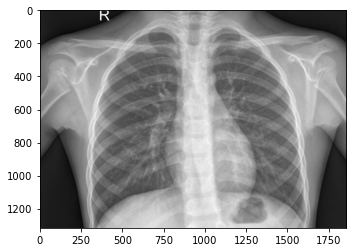

In [8]:
plt.imshow(img)

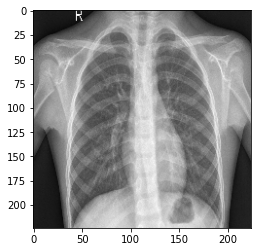

In [22]:
img_2 = cv2.resize(img,(224,224))
plt.imshow(img_2)

In [9]:
import os

In [28]:
DIR = os.listdir('/Users/miaoli/Desktop/Uchi/assignments/spring_2023/machine learning/project/chest_xray')
print(DIR)

['.DS_Store', 'test', 'chest_xray', '__MACOSX', 'train', 'val']


In [71]:
test_path = './chest_xray/test'
train_path = './chest_xray/train'
val_path = './chest_xray/val'
paths = [test_path, train_path, val_path]

In [73]:
img_data = {}
for path in paths:
    nml_path = os.listdir(path + '/NORMAL')
    pn_path = os.listdir(path + '/PNEUMONIA')
    if 'test' in path:
        print('Testing Data Normal Count: {}'.format(len(nml_path)))
        print('Testing Data Pneumonia Count: {}'.format(len(pn_path)))
        data_type = 'Test'
    elif 'train' in path: 
        print('Training Data Normal Count: {}'.format(len(nml_path)))
        print('Training Data Pneumonia Count: {}'.format(len(pn_path)))
        data_type = 'Train'
    else:
        print('Validation Data Normal Count: {}'.format(len(nml_path)))
        print('Validation Data Pneumonia Count: {}'.format(len(pn_path)))
        data_type = 'Validation'
    for img in nml_path:
        img_path = path + '/NORMAL/' + img
        hgt, wdh, lyr = read_image(img_path).shape
        img_data[img] = {'path': img_path, 'dimensions': (hgt, wdh), 'height': hgt, 'width': wdh, 'layers': lyr, 'data': data_type, 'label': 0}
    for img in pn_path: 
        img_path = path + '/PNEUMONIA/' + img
        hgt, wdh, lyr = read_image(img_path).shape
        img_data[img] = {'path': img_path, 'dimensions': (hgt, wdh), 'height': hgt, 'width': wdh, 'layers': lyr, 'data': data_type, 'label': 1}

Testing Data Normal Count: 234
Testing Data Pneumonia Count: 390
Training Data Normal Count: 1341
Training Data Pneumonia Count: 3875
Validation Data Normal Count: 8
Validation Data Pneumonia Count: 8


In [79]:
img_info = pd.DataFrame.from_dict(img_data, orient='index')
img_info = img_info.reset_index().rename(columns={'index':'img_name'})

In [97]:
img_dir_path + img_info.loc[:,'path'][1]

'/Users/miaoli/Desktop/Uchi/assignments/spring_2023/machine learning/project/./chest_xray/test/NORMAL/IM-0025-0001.jpeg'

In [75]:
test_df = img_info.loc[img_info.loc[:, 'data'] == 'Test']
train_df = img_info.loc[img_info.loc[:, 'data'] == 'Train']
val_df = test_df = img_info.loc[img_info.loc[:, 'data'] == 'Validation']

In [78]:
csv_file = '/Users/miaoli/Desktop/Uchi/assignments/spring_2023/machine learning/project/data_csv.csv'
img_info.to_csv(csv_file)

In [94]:
img_dir_path = '/Users/miaoli/Desktop/Uchi/assignments/spring_2023/machine learning/project/'

In [152]:
class Dataset():
    def __init__(self, df, img_dir_path, transforms=None):
        """
        You can set your custom dataset to take in more parameters than specified
        here. But, I recommend at least you start with the three I listed here,
        as these are standard

        csv_file (str): file path to the csv file you created /
        df (pandas df): pandas dataframe

        img_dir_path: directory path to your images
        transform: Compose (a PyTorch Class) that strings together several
          transform functions (e.g. data augmentation steps)

        One thing to note -- you technically could implement `transform` within
        the dataset. No one is going to stop you, but you can think of the
        transformations/augmentations you do as a hyperparameter. If you treat
        it as a hyperparameter, you want to be able to experiment with different
        transformations, and therefore, it would make more sense to decide those
        transformations outside the dataset class and pass it to the dataset!
        """
        self.img_labels = df
        self.labels = df.iloc[:, -1]
        self.img_dir = img_dir_path
        self.transforms = transforms

    def __len__(self):
        """
        Returns: (int) length of your dataset
        """
        return len(self.img_labels)

    def __getitem__(self, idx):
        """
        Loads and returns your sample (the image and the label) at the
        specified index

        Parameter: idx (int): index of interest

        Returns: image, label
        """

        img_path =  self.img_labels.iloc[idx, 1]
        
        image = read_image(img_path)

        label = self.img_labels.iloc[idx, -1]

        if self.transforms:
            image = T(image)

        return image, label

In [153]:
train_set = Dataset(train_df, img_dir_path, transforms=None)
train_set.labels.sum()/len(train_set)

0.7429064417177914

In [154]:
train_set[3]

(tensor([[[  0,   0,   0,  ..., 153, 153, 152],
          [  0,   0,   0,  ..., 153, 152, 150],
          [  0,   0,   0,  ..., 153, 152, 151],
          ...,
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]]], dtype=torch.uint8),
 0)

In [156]:
train_loader = torch.utils.data.DataLoader(train_set, shuffle = True)

In [134]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

./chest_xray/train/NORMAL/NORMAL2-IM-0927-0001.jpeg
Feature batch shape: torch.Size([1, 1, 2234, 2359])
Labels batch shape: torch.Size([1])


In [158]:
for x, y in train_loader:
    print(x, y)

tensor([[[[  9,   9,   9,  ..., 157, 157, 156],
          [  9,   9,   9,  ..., 157, 157, 156],
          [  8,   8,   8,  ..., 158, 157, 157],
          ...,
          [ 18,  18,  18,  ...,  44,  45,  46],
          [ 18,  18,  18,  ...,  44,  45,  46],
          [ 18,  18,  18,  ...,  44,  45,  46]]]], dtype=torch.uint8) tensor([1])
tensor([[[[22, 22, 22,  ..., 80, 82, 89],
          [22, 23, 23,  ..., 86, 86, 89],
          [23, 24, 24,  ..., 90, 87, 86],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]]]], dtype=torch.uint8) tensor([1])
tensor([[[[ 73,  71,  70,  ..., 192, 191, 191],
          [ 72,  71,  70,  ..., 192, 192, 191],
          [ 74,  73,  73,  ..., 192, 191, 190],
          ...,
          [  8,   8,   8,  ...,   8,   8,   8],
          [  8,   8,   8,  ...,   8,   8,   8],
          [  8,   8,   8,  ...,   8,   8,   8]]]], dtype=torch.uint8) tensor([1])
tensor([[[[ 0,  0,  0,  .

tensor([[[[ 0, 42, 41,  ...,  0,  0,  0],
          [ 1, 44, 43,  ...,  0,  0,  0],
          [ 0, 44, 43,  ...,  0,  0,  0],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]]]], dtype=torch.uint8) tensor([0])
tensor([[[[69, 71, 73,  ..., 76, 79, 84],
          [66, 71, 73,  ..., 74, 78, 84],
          [68, 75, 76,  ..., 76, 78, 85],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]]]], dtype=torch.uint8) tensor([0])
tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 1, 1, 1],
          [0, 0, 0,  ..., 1, 1, 1],
          [0, 0, 0,  ..., 1, 1, 1]]]], dtype=torch.uint8) tensor([1])
tensor([[[[46, 57, 73,  ..., 15,  3,  2],
          [45, 56, 73,  ...,  0,  0,  6],
          [43, 55, 74,  ...,  8, 12,  0],
       

tensor([[[[42, 44, 46,  ...,  0,  0,  0],
          [40, 43, 45,  ...,  0,  0,  0],
          [39, 41, 44,  ...,  0,  0,  0],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]]]], dtype=torch.uint8) tensor([1])
tensor([[[[  0, 113, 111,  ...,  11,  11,  12],
          [  0, 109, 106,  ...,  14,  14,  15],
          [  2, 103, 107,  ...,  11,  12,  13],
          ...,
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]]]], dtype=torch.uint8) tensor([0])
tensor([[[[71, 71, 72,  ..., 54, 53, 53],
          [73, 72, 73,  ..., 53, 52, 52],
          [74, 74, 75,  ..., 52, 51, 51],
          ...,
          [26, 32, 38,  ..., 79, 79, 79],
          [26, 32, 38,  ..., 79, 79, 79],
          [26, 32, 38,  ..., 79, 79, 79]],

         [[71, 71, 72,  ..., 54, 53, 53],
          [73, 72, 73,  ..., 53, 52, 52],
         

tensor([[[[  0,  25,  16,  ..., 148, 149, 157],
          [  0,  22,   9,  ..., 157, 158, 160],
          [  1,  21,   8,  ..., 151, 152, 158],
          ...,
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]]]], dtype=torch.uint8) tensor([0])
tensor([[[[ 37,  41,  43,  ..., 105, 109, 110],
          [ 39,  43,  45,  ..., 106, 108, 109],
          [ 42,  45,  46,  ..., 110, 111, 110],
          ...,
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]]]], dtype=torch.uint8) tensor([0])
tensor([[[[20, 22, 23,  ...,  0,  0,  0],
          [19, 21, 21,  ...,  0,  0,  0],
          [20, 20, 19,  ...,  0,  0,  0],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]]]], dtype=torch.uint8) tensor([0])
tensor([[[[0, 0, 0,  ...,

tensor([[[[  0, 174, 173,  ...,  49,  49,  46],
          [  0, 159, 152,  ...,  50,  50,  47],
          [  0, 143, 139,  ...,  51,  51,  48],
          ...,
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]]]], dtype=torch.uint8) tensor([0])
tensor([[[[207, 210, 213,  ...,  64,  61,  60],
          [207, 210, 212,  ...,  64,  61,  60],
          [209, 210, 211,  ...,  64,  62,  61],
          ...,
          [ 22,  22,  22,  ...,  27,  27,  27],
          [ 22,  22,  22,  ...,  27,  27,  27],
          [ 22,  22,  22,  ...,  27,  27,  27]]]], dtype=torch.uint8) tensor([1])
tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]], dtype=torch.uint8) tensor([1])
tensor([[[[30, 30, 30,  ...,  6,  5,  5],
          [30, 30, 

tensor([[[[  0, 173, 163,  ..., 125, 116, 115],
          [  1, 173, 157,  ..., 123, 116, 114],
          [  0, 169, 154,  ..., 123, 120, 118],
          ...,
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]]]], dtype=torch.uint8) tensor([0])
tensor([[[[144, 154, 163,  ...,  27,  26,  24],
          [137, 148, 158,  ...,  27,  26,  25],
          [133, 141, 151,  ...,  27,  26,  25],
          ...,
          [ 54,  53,  51,  ...,  17,  17,  17],
          [ 53,  52,  51,  ...,  17,  17,  17],
          [ 52,  52,  51,  ...,  17,  17,  17]]]], dtype=torch.uint8) tensor([1])
tensor([[[[110, 118, 120,  ...,  46,  47,  48],
          [115, 120, 120,  ...,  46,  47,  48],
          [120, 120, 117,  ...,  46,  47,  48],
          ...,
          [ 23,  24,  24,  ...,  20,  19,  19],
          [ 23,  24,  24,  ...,  20,  20,  20],
          [ 23,  24,  24,  ...,  20,  20,  20]]]], dtype=torch.uint8) t

tensor([[[[156, 154, 155,  ..., 205, 205, 205],
          [158, 157, 157,  ..., 205, 207, 207],
          [155, 153, 153,  ..., 204, 207, 208],
          ...,
          [  7,   6,   6,  ...,   5,   5,   5],
          [  7,   6,   6,  ...,   5,   5,   5],
          [  7,   6,   6,  ...,   5,   5,   5]]]], dtype=torch.uint8) tensor([1])
tensor([[[[ 82,  83,  85,  ...,  92,  91,  91],
          [ 82,  84,  85,  ...,  93,  93,  92],
          [ 82,  84,  86,  ...,  94,  94,  94],
          ...,
          [ 20,  23,   4,  ...,  23,  19,  32],
          [  5,   0,  35,  ...,  47,   0,  12],
          [255, 237, 249,  ..., 251, 248, 255]]]], dtype=torch.uint8) tensor([1])
tensor([[[[  5,   4,   6,  ...,   0,   0,   0],
          [ 11,   4,  10,  ...,   0,   0,   0],
          [  3,   2,   7,  ...,   0,   0,   0],
          ...,
          [250,   6,   0,  ...,   0,   0,   0],
          [255,   1,   6,  ...,   0,   0,   0],
          [255,   0,   6,  ...,   0,   0,   0]]]], dtype=torch.uint8) t

tensor([[[[116, 109, 115,  ..., 144, 140, 148],
          [112, 115, 120,  ..., 145, 141, 145],
          [113, 117, 121,  ..., 134, 139, 142],
          ...,
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]]]], dtype=torch.uint8) tensor([0])
tensor([[[[  0,  61,  57,  ..., 113, 117, 121],
          [  0,  61,  56,  ..., 115, 116, 118],
          [  0,  61,  55,  ..., 121, 121, 123],
          ...,
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]]]], dtype=torch.uint8) tensor([0])
tensor([[[[  6,   6,   6,  ..., 106, 102, 102],
          [  6,   6,   6,  ..., 101,  97, 101],
          [  6,   6,   6,  ...,  99,  96, 103],
          ...,
          [  7,   7,   7,  ..., 111, 114, 116],
          [  7,   7,   7,  ..., 111, 114, 116],
          [  7,   7,   7,  ..., 112, 115, 116]]]], dtype=torch.uint8) t

tensor([[[[  0, 231, 251,  ..., 174, 176, 176],
          [  1, 230, 246,  ..., 167, 173, 174],
          [  1, 227, 240,  ..., 173, 168, 179],
          ...,
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]]]], dtype=torch.uint8) tensor([0])
tensor([[[[57, 55, 53,  ..., 42, 42, 42],
          [52, 51, 51,  ..., 41, 41, 41],
          [49, 49, 50,  ..., 40, 40, 40],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]]]], dtype=torch.uint8) tensor([1])
tensor([[[[129, 125, 120,  ...,   1,   1,   1],
          [124, 124, 125,  ...,   1,   1,   1],
          [122, 125, 129,  ...,   1,   1,   1],
          ...,
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]]]], dtype=torch.uint8) tensor([1])
tensor([[[[0, 0, 0,  ...,

tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]], dtype=torch.uint8) tensor([1])
tensor([[[[  1,  45,  41,  ..., 255, 255, 255],
          [  1,  45,  43,  ..., 255, 255, 255],
          [  0,  46,  45,  ..., 255, 255, 255],
          ...,
          [  0,   0,   0,  ...,   5,  12,  18],
          [  0,   0,   0,  ...,   6,  12,  16],
          [  0,   0,   0,  ...,   6,  12,  16]]]], dtype=torch.uint8) tensor([0])
tensor([[[[49, 49, 49,  ..., 77, 77, 78],
          [49, 50, 50,  ..., 79, 79, 80],
          [50, 51, 51,  ..., 79, 79, 79],
          ...,
          [57, 55, 54,  ..., 64, 63, 61],
          [56, 55, 55,  ..., 64, 63, 61],
          [55, 56, 56,  ..., 64, 63, 62]],

         [[49, 49, 49,  ..., 77, 77, 78],
          [49, 50, 50,  ..., 79, 79, 80],
          [50, 51, 51,  ..., 79, 79, 79],
   

tensor([[[[172, 171, 167,  ..., 219, 210, 223],
          [170, 168, 164,  ..., 227, 208, 238],
          [168, 165, 160,  ..., 214, 226, 207],
          ...,
          [  0,   6,  11,  ...,  97, 114, 130],
          [  1,   0,   0,  ...,  98, 115, 134],
          [  5,   1,   9,  ...,  94, 112, 132]]]], dtype=torch.uint8) tensor([1])
tensor([[[[68, 70, 75,  ..., 24, 24, 24],
          [66, 67, 69,  ..., 23, 24, 23],
          [55, 57, 62,  ..., 23, 23, 23],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]]]], dtype=torch.uint8) tensor([1])
tensor([[[[26, 25, 25,  ..., 63, 65, 65],
          [24, 24, 24,  ..., 62, 64, 64],
          [24, 23, 24,  ..., 64, 65, 65],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]]]], dtype=torch.uint8) tensor([1])
tensor([[[[171, 168, 165,  ...,  49,  47,  47],
          [16

tensor([[[[31, 33, 37,  ..., 32, 32, 32],
          [33, 35, 38,  ..., 32, 32, 32],
          [36, 37, 40,  ..., 32, 32, 32],
          ...,
          [20, 24, 28,  ..., 49, 40, 39],
          [20, 23, 27,  ..., 33, 38, 45],
          [17, 20, 25,  ..., 41, 43, 44]]]], dtype=torch.uint8) tensor([1])
tensor([[[[51, 51, 52,  ...,  2,  1,  1],
          [51, 52, 52,  ...,  2,  1,  1],
          [53, 53, 53,  ...,  2,  2,  1],
          ...,
          [14, 14, 14,  ..., 13, 13, 13],
          [14, 14, 14,  ..., 13, 13, 13],
          [14, 14, 14,  ..., 13, 13, 13]]]], dtype=torch.uint8) tensor([1])
tensor([[[[6, 6, 6,  ..., 0, 0, 0],
          [6, 6, 6,  ..., 0, 0, 0],
          [6, 6, 6,  ..., 0, 0, 0],
          ...,
          [4, 3, 2,  ..., 3, 3, 3],
          [4, 3, 2,  ..., 3, 3, 3],
          [3, 3, 2,  ..., 3, 3, 3]]]], dtype=torch.uint8) tensor([1])
tensor([[[[0, 0, 0,  ..., 5, 5, 5],
          [0, 0, 0,  ..., 5, 5, 5],
          [0, 0, 0,  ..., 5, 5, 5],
          ...,
          

tensor([[[[ 40,  41,  42,  ..., 104, 113, 119],
          [ 40,  41,  42,  ..., 111, 121, 127],
          [ 40,  41,  42,  ..., 117, 127, 134],
          ...,
          [ 28,  28,  28,  ...,  49,  55,  59],
          [ 28,  28,  28,  ...,  49,  55,  59],
          [ 28,  28,  28,  ...,  49,  55,  59]]]], dtype=torch.uint8) tensor([1])
tensor([[[[  0,   0,   0,  ..., 124,  93,  64],
          [  0,   0,   0,  ..., 136, 115,  87],
          [  0,   0,   0,  ..., 108, 114, 110],
          ...,
          [  8,   8,   8,  ...,   9,  10,  10],
          [  8,   8,   8,  ...,   9,   9,  10],
          [  8,   8,   8,  ...,   9,   9,   9]]]], dtype=torch.uint8) tensor([1])
tensor([[[[119, 115, 124,  ..., 178, 174, 171],
          [112, 107, 115,  ..., 176, 174, 173],
          [108, 102, 108,  ..., 173, 176, 178],
          ...,
          [ 16,  16,  16,  ...,  24,  24,  24],
          [ 16,  16,  16,  ...,  24,  24,  24],
          [ 16,  16,  16,  ...,  24,  24,  24]]]], dtype=torch.uint8) t

tensor([[[[ 0,  0,  0,  ..., 13, 11, 10],
          [ 0,  0,  0,  ..., 10,  8,  7],
          [ 0,  0,  0,  ..., 11,  9,  7],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]]]], dtype=torch.uint8) tensor([0])
tensor([[[[36, 36, 37,  ..., 13, 13, 13],
          [36, 36, 37,  ..., 13, 13, 13],
          [36, 36, 37,  ..., 13, 13, 13],
          ...,
          [25, 25, 25,  ..., 27, 27, 27],
          [25, 25, 25,  ..., 27, 27, 27],
          [25, 25, 25,  ..., 27, 27, 27]]]], dtype=torch.uint8) tensor([1])
tensor([[[[25, 25, 25,  ..., 15, 17, 18],
          [29, 29, 30,  ..., 15, 17, 18],
          [32, 33, 34,  ..., 16, 17, 17],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]]]], dtype=torch.uint8) tensor([1])
tensor([[[[0, 0, 1,  ..., 0, 0, 0],
          [0, 0, 1,  ..., 0, 0, 0],
          [0, 0, 1,  ...,

tensor([[[[ 0,  0,  0,  ...,  8,  0,  7],
          [ 0,  0,  0,  ...,  0,  0, 11],
          [ 0,  0,  0,  ...,  5,  8,  0],
          ...,
          [ 0, 10, 17,  ...,  0,  0,  0],
          [ 0,  0,  3,  ...,  0,  0,  0],
          [ 3,  0, 17,  ...,  0,  0,  0]]]], dtype=torch.uint8) tensor([1])
tensor([[[[175, 166, 157,  ..., 148, 150, 141],
          [175, 165, 157,  ..., 146, 156, 159],
          [174, 165, 156,  ..., 149, 161, 164],
          ...,
          [ 22,  22,  20,  ...,  20,  20,  20],
          [ 22,  21,  20,  ...,  20,  20,  20],
          [ 22,  21,  20,  ...,  20,  20,  20]]]], dtype=torch.uint8) tensor([1])
tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]], dtype=torch.uint8) tensor([1])
tensor([[[[ 77,  69,  57,  ..., 187, 186, 184],
          [ 77,  68,  57,  ..., 190, 190, 188],
 

tensor([[[[ 96,  98,  99,  ...,  90,  89,  89],
          [ 97,  99, 100,  ...,  89,  87,  87],
          [ 98,  99, 101,  ...,  88,  86,  85],
          ...,
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]]]], dtype=torch.uint8) tensor([1])
tensor([[[[84, 80, 79,  ..., 96, 96, 96],
          [86, 81, 80,  ..., 95, 95, 94],
          [84, 84, 85,  ..., 97, 95, 93],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]]]], dtype=torch.uint8) tensor([0])
tensor([[[[170, 163, 160,  ..., 143, 141, 139],
          [171, 165, 164,  ..., 146, 138, 134],
          [169, 167, 167,  ..., 136, 127, 123],
          ...,
          [ 50,  42,  14,  ...,  11,  28,  38],
          [ 18,  44,  48,  ...,  19,  23,  18],
          [ 31,  37,  36,  ...,  22,  25,  26]]]], dtype=torch.uint8) tensor([1])
tensor([[[[66, 66, 65,  .

          [ 0, 25, 32,  ..., 28, 29, 29]]]], dtype=torch.uint8) tensor([0])
tensor([[[[ 39,  40,  41,  ..., 111, 112,  99],
          [ 39,  40,  41,  ..., 111, 112,  98],
          [ 39,  40,  41,  ..., 112, 112,  96],
          ...,
          [ 18,  18,  18,  ...,  18,  18,  18],
          [ 18,  18,  18,  ...,  18,  18,  18],
          [ 18,  18,  18,  ...,  18,  18,  18]]]], dtype=torch.uint8) tensor([1])
tensor([[[[39, 40, 42,  ..., 49, 48, 47],
          [42, 43, 43,  ..., 49, 47, 46],
          [46, 45, 45,  ..., 49, 47, 45],
          ...,
          [18, 18, 18,  ..., 19, 19, 19],
          [18, 18, 18,  ..., 19, 19, 19],
          [18, 18, 18,  ..., 19, 19, 19]]]], dtype=torch.uint8) tensor([1])
tensor([[[[164, 153, 142,  ...,  27,  27,  27],
          [157, 154, 152,  ...,  29,  29,  29],
          [138, 141, 147,  ...,  29,  29,  29],
          ...,
          [100, 101, 100,  ...,  55,  54,  53],
          [ 96,  98, 100,  ...,  57,  57,  55],
          [ 95, 105,  94,  ...,

tensor([[[[  1, 116, 114,  ...,  31,  29,  28],
          [  3, 118, 115,  ...,  30,  29,  28],
          [  4, 118, 115,  ...,  30,  29,  29],
          ...,
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]]]], dtype=torch.uint8) tensor([1])
tensor([[[[ 2,  7, 14,  ..., 83, 83, 83],
          [ 7, 12, 19,  ..., 84, 83, 83],
          [14, 19, 27,  ..., 85, 83, 82],
          ...,
          [14, 28, 26,  ..., 45, 29, 32],
          [23, 19, 26,  ..., 43, 31, 34],
          [30,  2, 25,  ..., 35, 24, 32]]]], dtype=torch.uint8) tensor([1])
tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 9,  ..., 9, 0, 0],
          [6, 2, 0,  ..., 0, 2, 6],
          [0, 2, 7,  ..., 7, 2, 0]]]], dtype=torch.uint8) tensor([1])
tensor([[[[150, 141, 133,  ..., 112, 111, 107],
          [160, 149, 140,  ..., 109, 108, 105],
 

KeyboardInterrupt: 

In [120]:
torch.set_printoptions(linewidth = 120)